In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

In [3]:
path_to_file = "/users/desktop/documents/coursera/data_files/data-collisions.csv"
accident_data = pd.read_csv(path_to_file, encoding='utf-8')

print(type(accident_data))

C:\Users\Desktop\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>


In [4]:
accident_data.shape

(194673, 38)

In [5]:
accident_data.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.279658  47.553405        33    1268       1268  3672152   
1             2 -122.337348  47.520472        53   56100      56100  2619853   
2             1 -122.376182  47.499490        74   32000      32000  1215388   
3             1 -122.333924  47.604678       140   29700      29700  1482326   
4             2 -122.322187  47.618733       141    1135       1135  3605976   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  33499.0  ...      Dry                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Wet                 Daylight   
4  Matched  Intersection  29069.0  ...      Dry                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN        Y         14   
1           NaN   6256005.0        Y         50   
2           NaN   4176028.0        Y         32   
3           NaN   4065042.0        Y         14   
4           NaN         NaN        Y         10   

                                          ST_COLDESC  SEGLANEKEY  \
0  From same direction - both going straight - on...           0   
1                                       Fixed object           0   
2                             One parked--one moving           0   
3  From same direction - both going straight - on...           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

In [6]:
accident_data2 = accident_data[['ADDRTYPE','PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 
                                'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'COLLISIONTYPE', 'SEVERITYCODE']]
accident_data2.head()

ADDRTYPE  PERSONCOUNT  VEHCOUNT  \
0  Intersection            3         2   
1         Block            1         1   
2         Block            4         4   
3         Block            2         2   
4  Intersection            2         2   

                              JUNCTIONTYPE  WEATHER ROADCOND  \
0   At Intersection (intersection related)    Clear      Dry   
1  Mid-Block (not related to intersection)  Raining      Wet   
2     Mid-Block (but intersection related)    Clear      Dry   
3  Mid-Block (not related to intersection)  Raining      Wet   
4   At Intersection (intersection related)    Clear      Dry   

                 LIGHTCOND SPEEDING COLLISIONTYPE  SEVERITYCODE  
0                 Daylight        Y    Rear Ended             2  
1  Dark - Street Lights On        Y         Other             2  
2                 Daylight        Y    Parked Car             1  
3                 Daylight        Y    Rear Ended             1  
4                 Daylight        Y        Angles             2

In [7]:
#Evaluating for missing data
missing_data = accident_data2.isnull()
missing_data.head(5)

ADDRTYPE  PERSONCOUNT  VEHCOUNT  JUNCTIONTYPE  WEATHER  ROADCOND  \
0     False        False     False         False    False     False   
1     False        False     False         False    False     False   
2     False        False     False         False    False     False   
3     False        False     False         False    False     False   
4     False        False     False         False    False     False   

   LIGHTCOND  SPEEDING  COLLISIONTYPE  SEVERITYCODE  
0      False     False          False         False  
1      False     False          False         False  
2      False     False          False         False  
3      False     False          False         False  
4      False     False          False         False

In [8]:
#counted missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64



In [9]:
# removed any row with any data point missing in any column.
accident_data2.dropna(axis=0, how='any', subset=None, inplace=True)

C:\Users\Desktop\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#verified missing data is removed.
for column in accident_data2.columns.values.tolist():
    print(column)
    print (accident_data2[column].value_counts())
    print("")

ADDRTYPE
Block           119362
Intersection     63298
Alley              235
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
2     105703
3      34812
4      14327
1      11232
5       6541
0       5365
6       2686
7       1121
8        531
9        213
10       127
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
2     141647
1      25029
3      12869
4       2407
5        526
0        195
6        144
7         45
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
Mid-Block (not 

In [11]:
#Reset index since some rows were removed
accident_data2.reset_index(drop=True, inplace=True)
accident_data2.head()

ADDRTYPE  PERSONCOUNT  VEHCOUNT  \
0  Intersection            3         2   
1         Block            1         1   
2         Block            4         4   
3         Block            2         2   
4  Intersection            2         2   

                              JUNCTIONTYPE  WEATHER ROADCOND  \
0   At Intersection (intersection related)    Clear      Dry   
1  Mid-Block (not related to intersection)  Raining      Wet   
2     Mid-Block (but intersection related)    Clear      Dry   
3  Mid-Block (not related to intersection)  Raining      Wet   
4   At Intersection (intersection related)    Clear      Dry   

                 LIGHTCOND SPEEDING COLLISIONTYPE  SEVERITYCODE  
0                 Daylight        Y    Rear Ended             2  
1  Dark - Street Lights On        Y         Other             2  
2                 Daylight        Y    Parked Car             1  
3                 Daylight        Y    Rear Ended             1  
4                 Daylight        Y        Angles             2

In [12]:
#Evaluate the data types
accident_data2[["SEVERITYCODE"]] = accident_data2[["SEVERITYCODE"]].astype("str")
accident_data2.dtypes

C:\Users\Desktop\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


ADDRTYPE         object
PERSONCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
SPEEDING         object
COLLISIONTYPE    object
SEVERITYCODE     object
dtype: object

In [13]:
X = accident_data2[['ADDRTYPE','PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 
                                'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'COLLISIONTYPE']].values
X[0:10]

array([['Intersection', 3, 2, 'At Intersection (intersection related)',
        'Clear', 'Dry', 'Daylight', 'Y', 'Rear Ended'],
       ['Block', 1, 1, 'Mid-Block (not related to intersection)',
        'Raining', 'Wet', 'Dark - Street Lights On', 'Y', 'Other'],
       ['Block', 4, 4, 'Mid-Block (but intersection related)', 'Clear',
        'Dry', 'Daylight', 'Y', 'Parked Car'],
       ['Block', 2, 2, 'Mid-Block (not related to intersection)',
        'Raining', 'Wet', 'Daylight', 'Y', 'Rear Ended'],
       ['Intersection', 2, 2, 'At Intersection (intersection related)',
        'Clear', 'Dry', 'Daylight', 'Y', 'Angles'],
       ['Block', 6, 2, 'Mid-Block (not related to intersection)',
        'Clear', 'Dry', 'Daylight', 'Y', 'Sideswipe'],
       ['Block', 4, 2, 'Mid-Block (but intersection related)', 'Clear',
        'Dry', 'Daylight', 'Y', 'Sideswipe'],
       ['Block', 1, 1, 'Mid-Block (but intersection related)', 'Clear',
        'Dry', 'Dark - Street Lights On', 'Y', 'Other'],
   

In [14]:
from sklearn import preprocessing
le_ADDRTYPE = preprocessing.LabelEncoder()
le_ADDRTYPE.fit(['Intersection', 'Block', 'Alley'])
X[:,0] = le_ADDRTYPE.transform(X[:,0]) 

le_JUNCTIONTYPE = preprocessing.LabelEncoder()
le_JUNCTIONTYPE.fit(['Mid-Block (not related to intersection)', 'At Intersection (intersection related)', 
                     'Mid-Block (but intersection related)', 'Driveway Junction',
                     'At Intersection (but not related to intersection)', 'Ramp Junction', 'Unknown'])
X[:,3] = le_JUNCTIONTYPE.transform(X[:,3]) 

le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit(['Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain',
               'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
X[:,4] = le_WEATHER.transform(X[:,4]) 

le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit(['Dry', 'Wet', 'Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
X[:,5] = le_ROADCOND.transform(X[:,5]) 

le_LIGHTCOND = preprocessing.LabelEncoder()
le_LIGHTCOND.fit(['Daylight', 'Dark - Street Lights On', 'Unknown', 'Dusk', 'Dawn', 'Dark - No Street Lights', 
                  'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'])
X[:,6] = le_LIGHTCOND.transform(X[:,6]) 

le_SPEEDING = preprocessing.LabelEncoder()
le_SPEEDING.fit(['N', 'Y'])
X[:,7] = le_SPEEDING.transform(X[:,7])

le_COLLISIONTYPE = preprocessing.LabelEncoder()
le_COLLISIONTYPE.fit(['Parked Car', 'Angles', 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian',
                     'Cycles', 'Right Turn', 'Head On'])
X[:,8] = le_COLLISIONTYPE.transform(X[:,8])

X[0:10]

array([[2, 3, 2, 1, 1, 0, 5, 1, 7],
       [1, 1, 1, 4, 6, 8, 2, 1, 4],
       [1, 4, 4, 3, 1, 0, 5, 1, 5],
       [1, 2, 2, 4, 6, 8, 5, 1, 7],
       [2, 2, 2, 1, 1, 0, 5, 1, 0],
       [1, 6, 2, 4, 1, 0, 5, 1, 9],
       [1, 4, 2, 3, 1, 0, 5, 1, 9],
       [1, 1, 1, 3, 1, 0, 2, 1, 4],
       [1, 3, 1, 4, 6, 8, 2, 1, 4],
       [1, 2, 1, 4, 4, 8, 2, 1, 4]], dtype=object)

In [15]:
y=accident_data2["SEVERITYCODE"]
y[0:10]

0    2
1    2
2    1
3    1
4    2
5    1
6    1
7    1
8    1
9    1
Name: SEVERITYCODE, dtype: object

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
#Verify dimensions match
print ('Train set:', X_trainset.shape,  y_trainset.shape)

Train set: (128026, 9) (128026,)


In [20]:
#Verify dimensions match
print ('Test set:', X_testset.shape,  y_testset.shape)

Test set: (54869, 9) (54869,)


In [19]:
accidentseveritytree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
accidentseveritytree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
accidentseveritytree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
predTree = accidentseveritytree.predict(X_testset)

In [22]:
print (predTree [0:5])
print (y_testset [0:5])

['1' '1' '1' '1' '1']
35384    1
82472    1
28494    1
53189    1
27640    1
Name: SEVERITYCODE, dtype: object


In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7428602671818331


In [24]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [25]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\Desktop\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


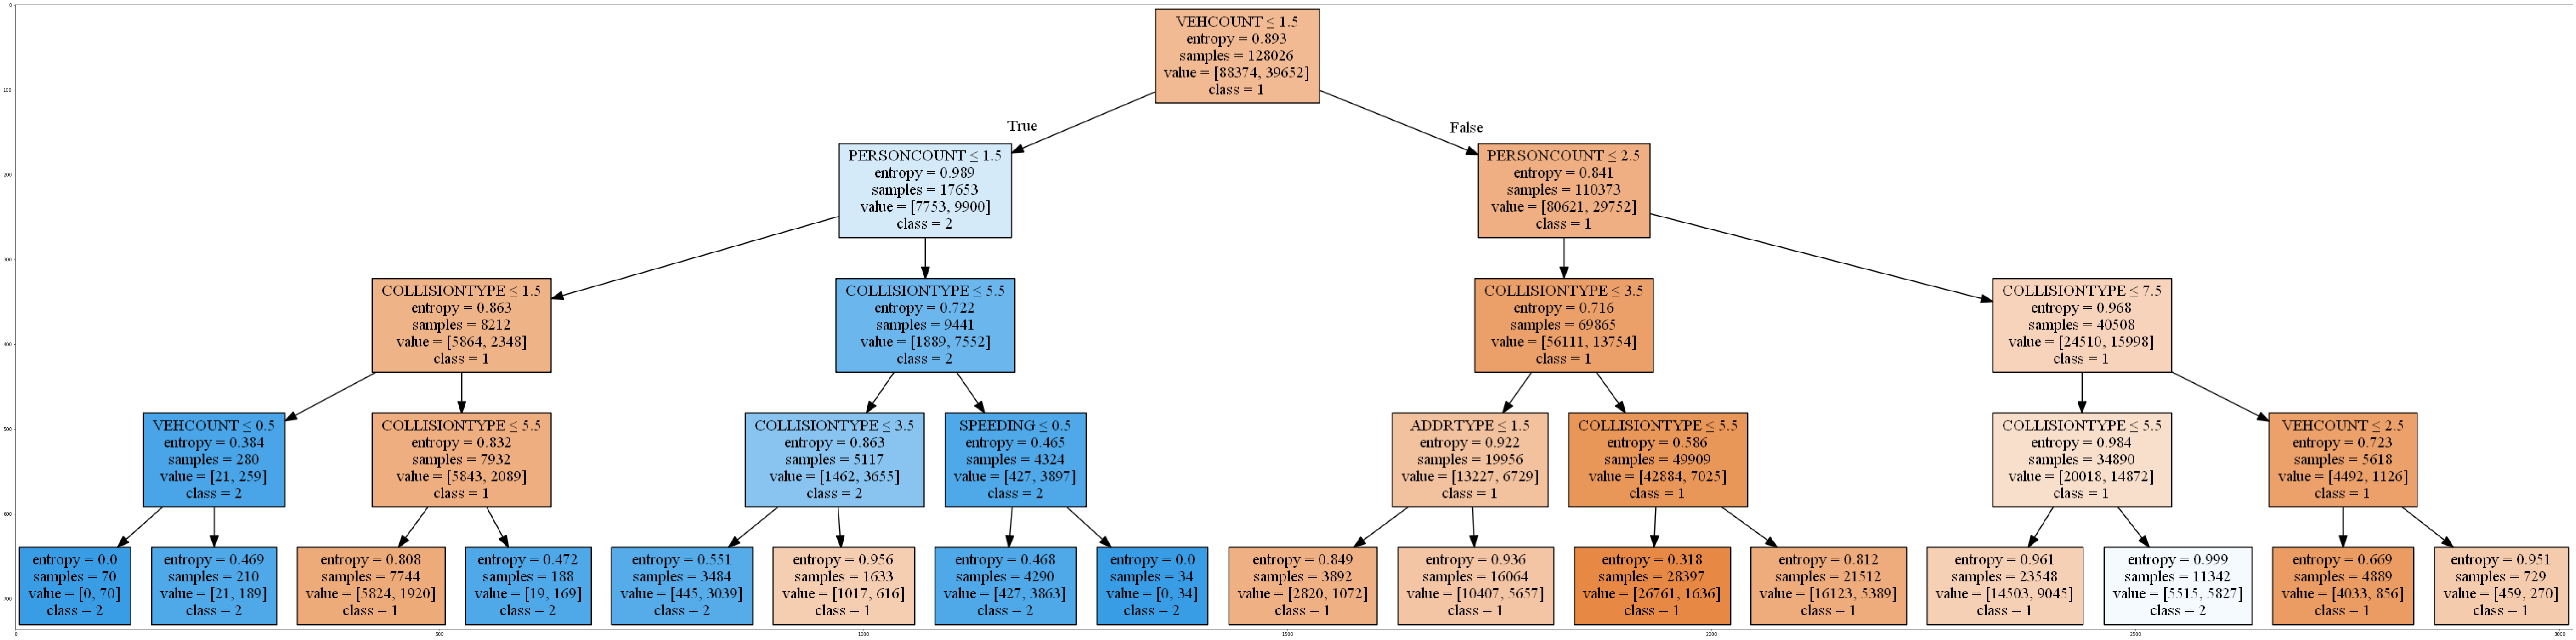

In [26]:
dot_data = StringIO()
filename = "accidentseveritytree.png"
featureNames = accident_data2.columns[0:9]
targetNames = accident_data2["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(accidentseveritytree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [27]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#k = 4
#Train Model and Predict  
#neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#neigh

In [30]:
#yhat = neigh.predict(X_testset)
#yhat[0:5]

In [31]:
#from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
#print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

In [32]:
#Ks = 10
#mean_acc = np.zeros((Ks-1))
#std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
#for n in range(1,Ks):
    
    #Train Model and Predict  
#    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
#    yhat=neigh.predict(X_test)
#    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
#    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#mean_acc

In [33]:
#plt.plot(range(1,Ks),mean_acc,'g')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#plt.legend(('Accuracy ', '+/- 3xstd'))
#plt.ylabel('Accuracy ')
#plt.xlabel('Number of Nabors (K)')
#plt.tight_layout()
#plt.show()

In [34]:
#print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [35]:
#k = 8
#Train Model and Predict  
#neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#neigh
#from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
#print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

In [36]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
yhat = LR.predict(X_test)
yhat

array(['1', '1', '1', ..., '1', '1', '2'], dtype=object)

In [39]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.87759479, 0.12240521],
       [0.56602347, 0.43397653],
       [0.75118176, 0.24881824],
       ...,
       [0.75556805, 0.24443195],
       [0.69772747, 0.30227253],
       [0.18962876, 0.81037124]])

In [40]:
#jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\Desktop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7089860302359278